In [1]:
import utilities
import features
import librosa
import matplotlib.pyplot as plt
import numpy as np
import mir_eval

Chromagram evaluation with beat-tracking </br>
-> CRP chroma

(0.0, 20.0)

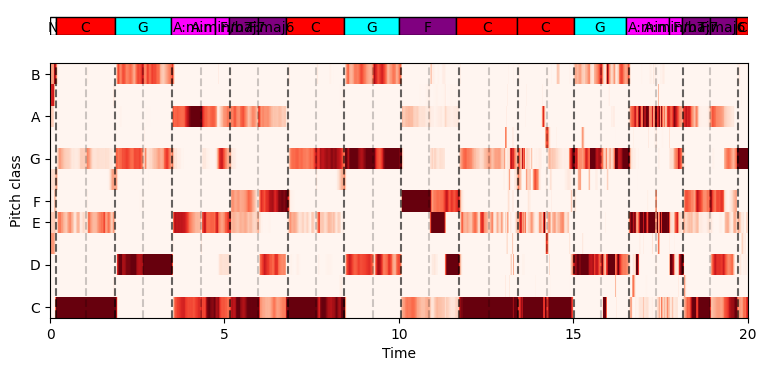

In [4]:
start = 0
stop = 20
path = "/home/max/ET-TI/Masterarbeit/mirdata/beatles/"
# title = "06_-_Rubber_Soul/11_-_In_My_Life"
title = "12_-_Let_It_Be/06_-_Let_It_Be"
# title = "10CD1_-_The_Beatles/CD1_-_17_-_Julia"

y,sr = librosa.load(path+"/audio/"+title+".wav",mono=True,offset=start,duration=stop-start,sr=22050)
target = mir_eval.io.load_labeled_intervals(path+"/annotations/chordlab/The Beatles/"+title+".lab",' ','#')

t, chroma = features.crpChroma(y,nCRP=22)
try:
    if not downbeats:
        downbeats, upbeats = features.madmom_beats(path+"/audio/"+title+".wav",2)
except NameError:
    downbeats, upbeats = features.madmom_beats(path+"/audio/"+title+".wav",2)
fig,ax = plt.subplots(2,1,height_ratios=(1,10),figsize=(9,4))
utilities.plotChordAnnotations(ax[0],target,(start,stop))
utilities.plotChromagram(ax[1],t,chroma,downbeats,upbeats);
ax[1].set_xlim(start,stop)

Complexity features

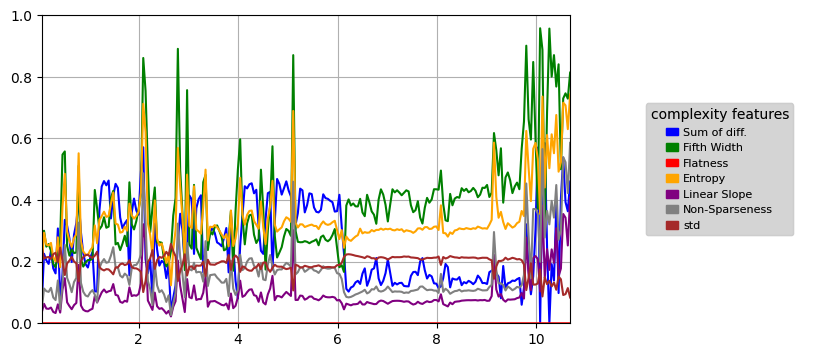

In [ ]:
complexity_features = [
                features.sumChromaDifferences(chroma),
                features.angularDeviation(chroma),
                features.flatness(chroma),
                features.shannonEntropy(chroma),
                features.negativeSlope(chroma),
                features.nonSparseness(chroma),
                features.standardDeviation(chroma)
]
fig,ax = plt.subplots(1,2,width_ratios=(7.5,2.5),figsize=(10,4))
utilities.plotComplexityFeatures(ax[0],ax[1],t,complexity_features)
